<a href="https://colab.research.google.com/github/migostro/laboratorio-de-visao/blob/main/NormalizeDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files, drive
from skimage.exposure import equalize_hist, histogram
import imageio
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def setFigSize():
    return((5,5))

def myImgShow(img):
    plt.figure(figsize=setFigSize())
    plt.axis('equal')
    plt.imshow(img,cmap='gray')
    plt.show()

In [ ]:
# Apenas coloque True caso queira que a função que gera e salva as imagens 
SALVA_IMAGENS = False

drive.mount('/content/drive')

# pasta onde as imagens vão ser lidas
pasta_raiz = "/content/drive/MyDrive/ime/mac0417/ep"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Algoritmo recursivo que recebe a pasta_raiz que estão as imagens e uma lista vazia caminhos
# Retorna todos os caminhos até as imagens
def monta_caminhos(pasta_in, caminhos_in = []):
    for nome in os.listdir(pasta_in):
        caminho = os.path.join(pasta_in, nome)

        # Adiciona apenas caminhos que são de arquivos (que no nosso caso são imagens)
        if os.path.isfile(caminho):
            caminhos_in.append(caminho)
        else:
            monta_caminhos(caminho, caminhos_in)
    return caminhos_in

In [ ]:
# pasta onde os arquivos serão salvos
pasta_augmented = pasta_raiz + "/augmentedDataSet"
pasta_normalized = pasta_raiz + "/normalizedDataSet"
pasta_gray = pasta_raiz + "/originalGreyDataSet"

In [ ]:
# pega o caminho da imagens que estão na augmentedDataSet
caminhos_augmented = monta_caminhos(pasta_augmented)

In [ ]:
if SALVA_IMAGENS:
  # assume que todas as fotos tem o mesmo tamanho
  for caminho in caminhos_augmented:
      imagem = imageio.imread(caminho)

      #print(imagem)

      nome_arquivo = caminho.split('/')[-1]

      # pastas que estão entre a originalDataSet e o arquivo (não incluindo nenhum dos dois)
      local_salvo = caminho[len(pasta_augmented):len(caminho)-len(nome_arquivo)]

      # Equaliza a imagem
      imagem = equalize_hist(imagem)

      imagem = imagem * 255
      imagem = imagem.astype(np.uint8)

      # cria os diretorio recursivamente caso não existam
      # TODO: fazer isto fora deste for
      if not os.path.isdir(pasta_normalized + local_salvo):
        os.makedirs(pasta_normalized + local_salvo)

      imageio.imsave(pasta_normalized + local_salvo + nome_arquivo, imagem)

### Análise da variação das classes

In [ ]:
# Recebe os caminhos para todas imagens e os nomes das classes
# Retorna a imagem media de cada classe
def calcula_media_classes(caminhos, classes):
  img = imageio.imread(caminhos[0])

  media_classes = []
  quantidade_imagens_por_classe = np.zeros([len(classes)])

  #x = map()

  for classe in classes:
    media_classes.append(np.zeros(img.shape).astype(np.uint32))


  for caminho in caminhos:
    imagem = imageio.imread(caminho)

    for i in range(len(classes)):
      # encontra de qual classe é a imagem
      if classes[i] == caminho.split('/')[-2]:
        # soma a imagem a classe correspondente
        media_classes[i] += imagem
        quantidade_imagens_por_classe[i] += 1

        break

  for i in range(len(classes)):
    media_classes[i] = media_classes[i]/quantidade_imagens_por_classe[i]

  return media_classes

classes = ['celulares', 'conchas', 'copos de shot', 'dados', 'desodorantes', 'estatuas', 'perfumes', 'tesouras', 'tubos', 'vasos'] 



In [ ]:
imagens_media_augmented = calcula_media_classes(caminhos_augmented, classes)

In [ ]:
caminhos_gray = monta_caminhos(pasta_gray, [])
imagens_media_gray = calcula_media_classes(caminhos_gray, classes)

In [ ]:
caminhos_normalized = monta_caminhos(pasta_normalized, [])
imagens_media_normalized = calcula_media_classes(caminhos_normalized, classes)

celulares 



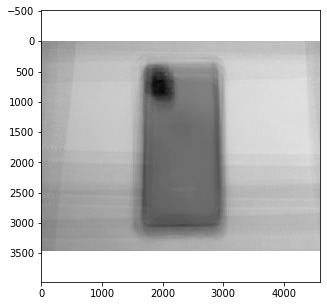

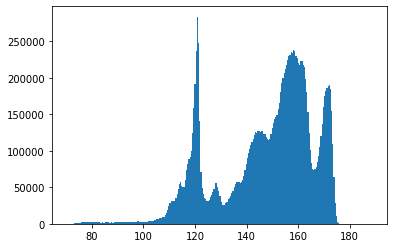




conchas 



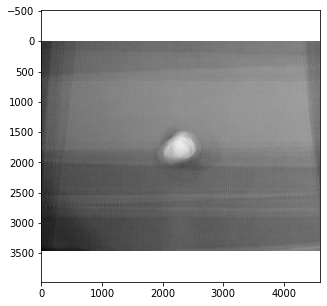

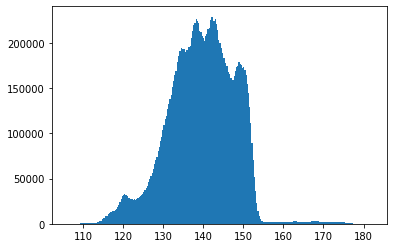




copos de shot 



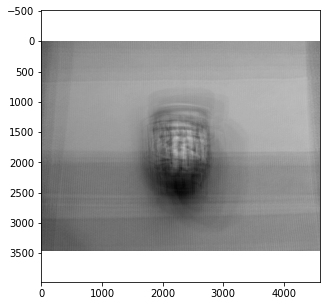

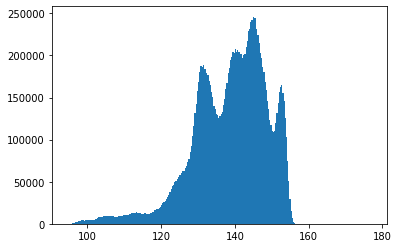




dados 



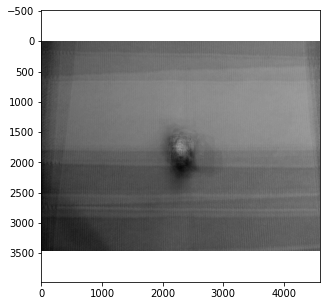

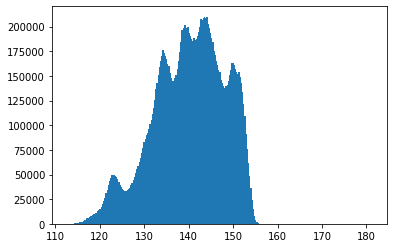




desodorantes 



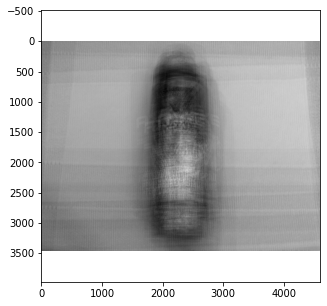

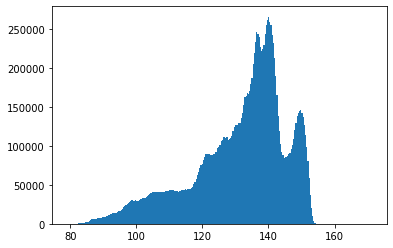




estatuas 



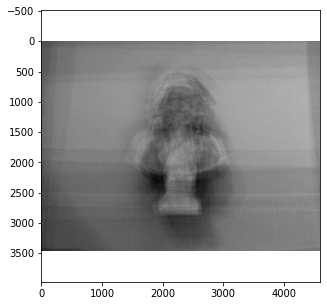

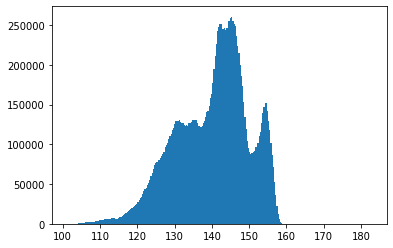




perfumes 



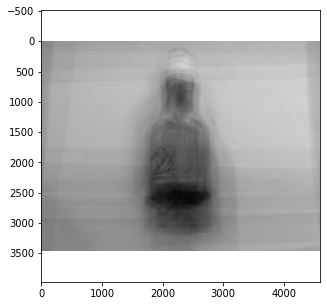

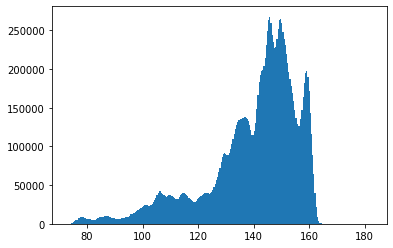




tesouras 



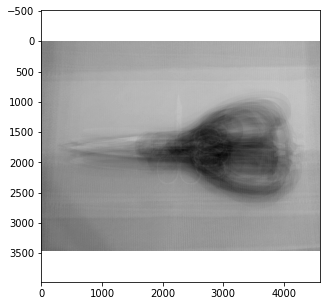

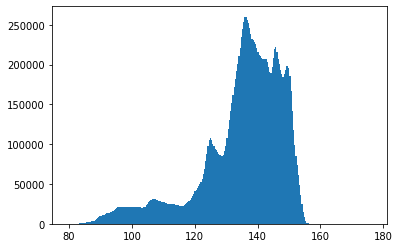




tubos 



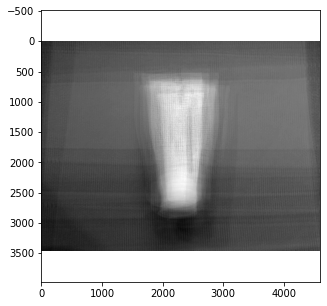

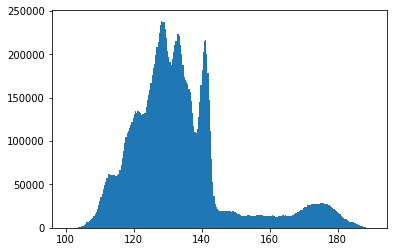




vasos 



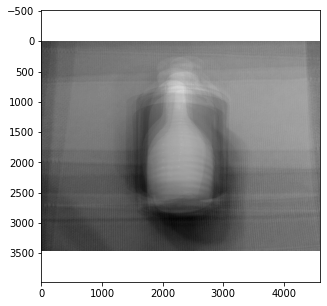

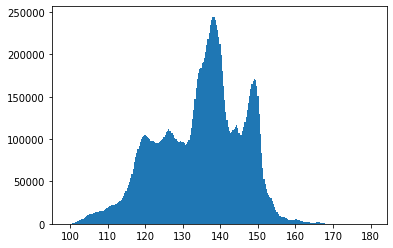

In [ ]:
for i in range(len(classes)):
  print(classes[i], '\n')
  myImgShow(imagens_media_augmented[i])
  plt.hist(imagens_media_augmented[i].ravel(), bins = 256)
  plt.show()
  print('\n\n')

celulares 



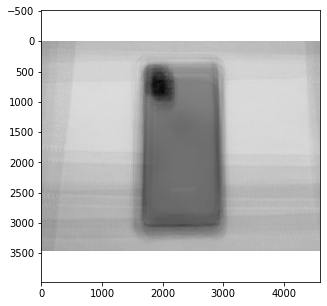

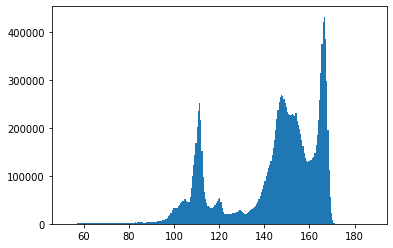




conchas 



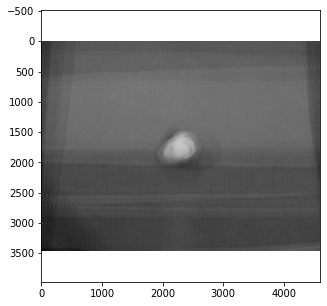

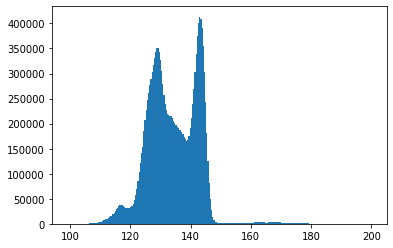




copos de shot 



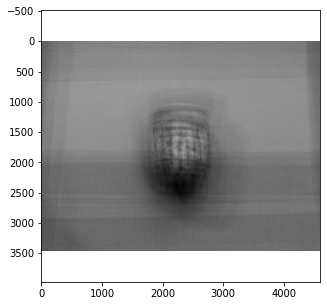

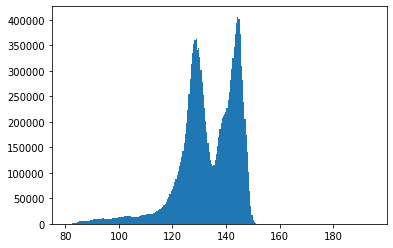




dados 



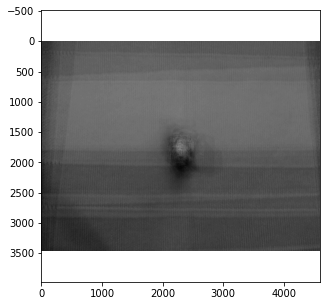

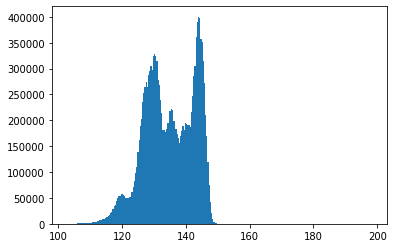




desodorantes 



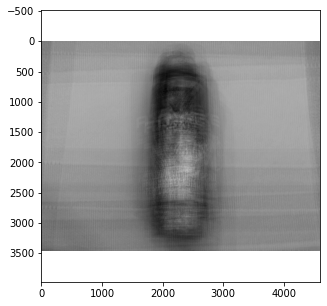

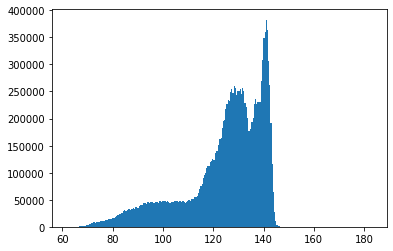




estatuas 



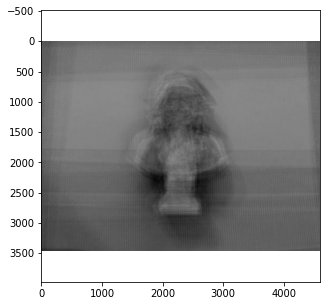

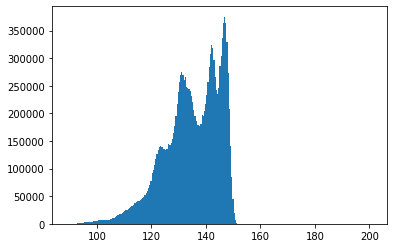




perfumes 



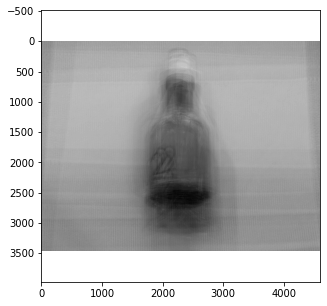

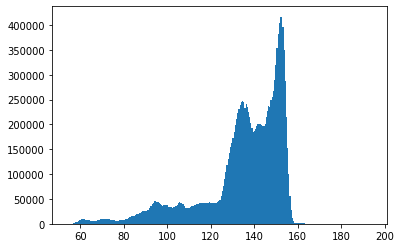




tesouras 



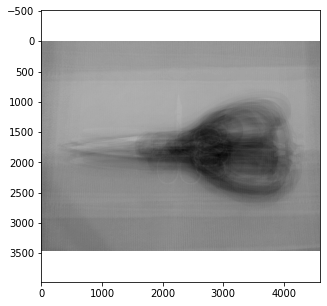

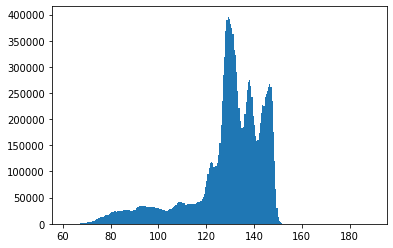




tubos 



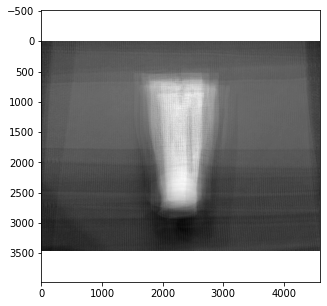

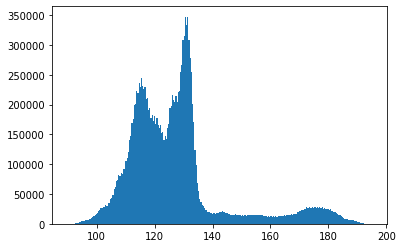




vasos 



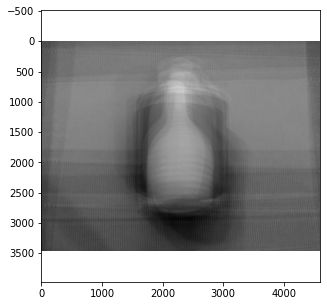

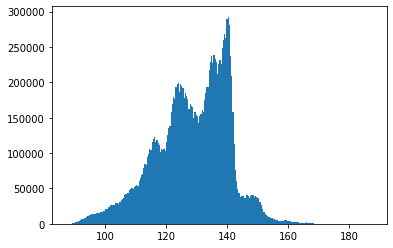

In [ ]:
for i in range(len(classes)):
  print(classes[i], '\n')
  myImgShow(imagens_media_gray[i])
  plt.hist(imagens_media_gray[i].ravel(), bins = 256)
  plt.show()
  print('\n\n')

celulares 



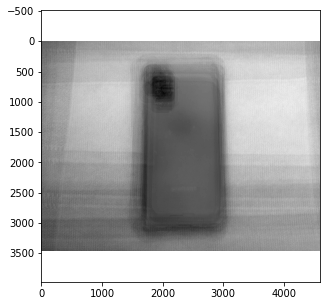

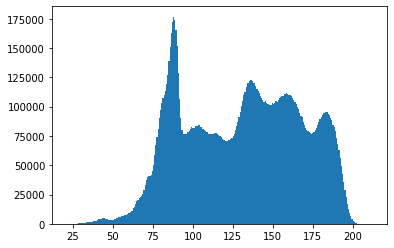




conchas 



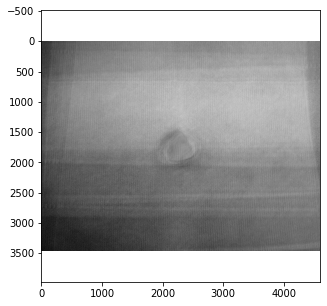

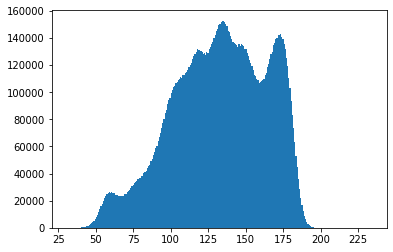




copos de shot 



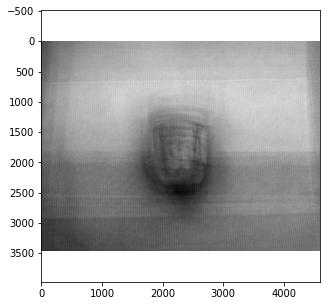

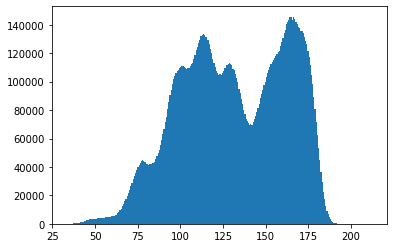




dados 



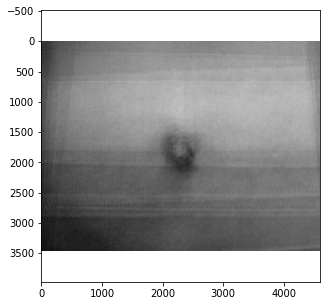

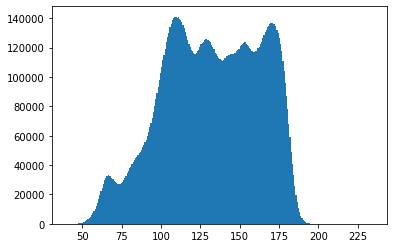




desodorantes 



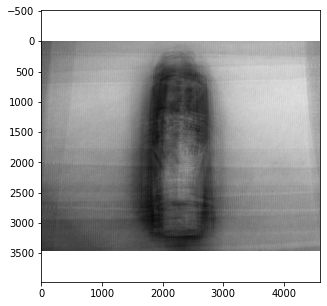

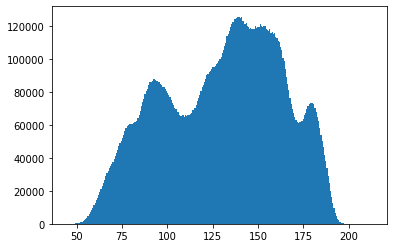




estatuas 



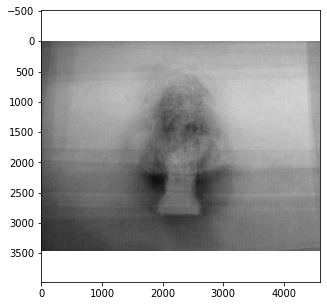

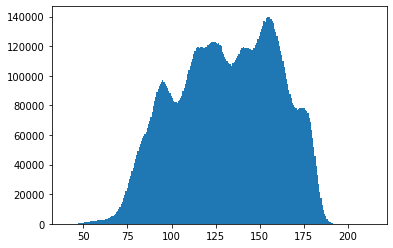




perfumes 



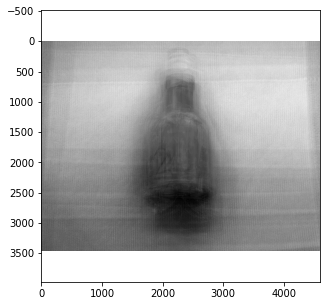

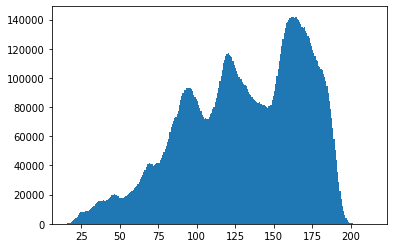




tesouras 



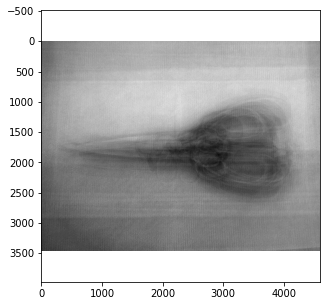

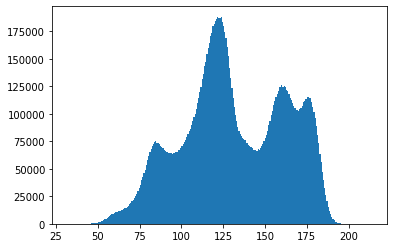




tubos 



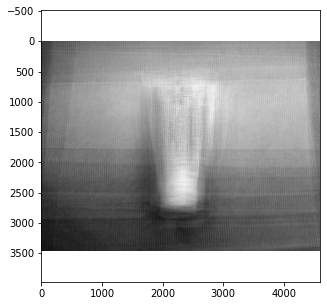

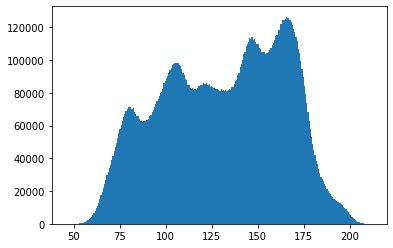




vasos 



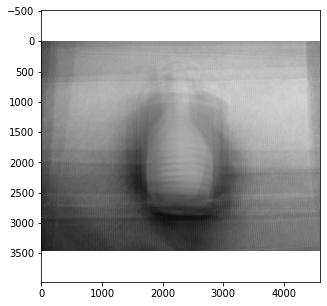

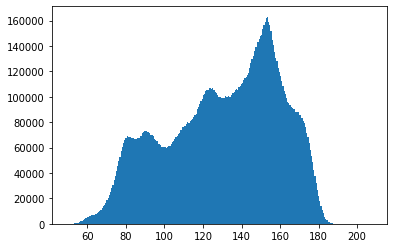

In [ ]:
for i in range(len(classes)):
  print(classes[i], '\n')
  myImgShow(imagens_media_normalized[i])
  plt.hist(imagens_media_normalized[i].ravel(), bins = 256)
  plt.show()
  print('\n\n')